<a href="https://colab.research.google.com/github/prakharrustagi42/Prakhar_INFO5731_Fall2025/blob/main/Rustagi_Prakhar_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 2**

In this assignment, you will work on gathering text data from an open data source via web scraping or API. Following this, you will need to clean the text data and perform syntactic analysis on the data. Follow the instructions carefully and design well-structured Python programs to address each question.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

* **Make sure to submit the cleaned data CSV in the comment section - 10 points**

**Total points**: 100

**Deadline**: Monday, at 11:59 PM.

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**

**Please check that the link you submitted can be opened and points to the correct assignment.**


# Question 1 (25 points)

Write a python program to collect text data from **either of the following sources** and save the data into a **csv file:**

(1) Collect all the customer reviews of a product (you can choose any porduct) on amazon. [atleast 1000 reviews]

(2) Collect the top 1000 User Reviews of a movie recently in 2023 or 2024 (you can choose any movie) from IMDB. [If one movie doesn't have sufficient reviews, collect reviews of atleast 2 or 3 movies]


(3) Collect the **abstracts** of the top 10000 research papers by using the query "machine learning", "data science", "artifical intelligence", or "information extraction" from Semantic Scholar.

(4) Collect all the information of the 904 narrators in the Densho Digital Repository.

(5)**Collect a total of 10000 reviews** of the top 100 most popular software from G2 and Capterra.


In [3]:
!pip install selenium
!pip install webdriver-manager

import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.firefox import GeckoDriverManager
import time


def scrape_imdb_reviews(url, scroll_pause=2, max_scrolls=20):
    """Scrape IMDb reviews after clicking 'See all' and scrolling until all load."""

    options = webdriver.FirefoxOptions()
    options.add_argument("--headless")

    print("Starting Firefox WebDriver...")
    driver = webdriver.Firefox(
        options=options
    )
    wait = WebDriverWait(driver, 10)

    print(f"Opening page: {url}")
    driver.get(url)

    # 1. Click the main "See all" button
    try:
        print("Looking for 'See all' button...")
        see_all_btn = wait.until(
            EC.element_to_be_clickable((By.XPATH, "//span[contains(@class,'ipc-see-more__text') and text()='See all']"))
        )
        driver.execute_script("arguments[0].click();", see_all_btn)
        print("Clicked 'See all' button")
        time.sleep(2)
    except Exception:
        print("Could not find 'See all' button, scraping current page only")

    # 2. Scroll to load all reviews
    print("Scrolling to load reviews...")
    last_height = driver.execute_script("return document.body.scrollHeight")
    scrolls = 0
    while scrolls < max_scrolls:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(scroll_pause)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            print("Reached bottom of page")
            break
        last_height = new_height
        scrolls += 1
        print(f"   Scroll {scrolls} complete")

    # 3. Expand spoiler reviews
    print("Expanding spoiler reviews (if any)...")
    spoiler_buttons = driver.find_elements(By.CSS_SELECTOR, "button.review-spoiler-button")
    expanded = 0
    for btn in spoiler_buttons:
        try:
            driver.execute_script("arguments[0].click();", btn)
            expanded += 1
            time.sleep(0.3)
        except Exception:
            pass
    print(f"Expanded {expanded} spoiler reviews")

    # 4. Collect all review containers
    print("Extracting review data...")
    reviews = []
    review_blocks = driver.find_elements(By.CSS_SELECTOR, "article.user-review-item")

    for idx, block in enumerate(review_blocks, 1):
        try:
            rating = block.find_element(By.CSS_SELECTOR, ".ipc-rating-star--rating").text
        except:
            rating = None
        try:
            title = block.find_element(By.CSS_SELECTOR, "div[data-testid='review-summary']").text
        except:
            title = None
        try:
            author = block.find_element(By.CSS_SELECTOR, "a[data-testid='author-link']").text
        except:
            author = None
        try:
            date = block.find_element(By.CSS_SELECTOR, "li.review-date").text
        except:
            date = None
        try:
            text = block.find_element(By.CSS_SELECTOR, "div.ipc-html-content").text
        except:
            text = None
        try:
            helpful = block.find_element(By.CSS_SELECTOR, ".ipc-voting__label__count--up").text
        except:
            helpful = None

        reviews.append({
            "rating": rating,
            "title": title,
            "author": author,
            "date": date,
            "text": text,
            "helpful": helpful
        })

        if idx % 50 == 0:
            print(f"   Extracted {len(reviews)} reviews...")
        if idx % 1000 == 0:
            break

    driver.quit()
    print(f"Finished! Extracted {len(reviews)} reviews total.")
    return reviews


if __name__ == "__main__":
    imdb_url = "https://www.imdb.com/title/tt5950044/reviews/"
    data = scrape_imdb_reviews(imdb_url, scroll_pause=2, max_scrolls=30)
    data = pd.DataFrame(data)

    data.to_csv("imdb_reviews.csv", index=False)
    # for idx, r in enumerate(data[:5], 1):  # show first 5 reviews
    #     print(f"\n{idx}. {r['author']} ({r['date']}) - {r['rating']}/10")
    #     print(f"   {r['title']}")
    #     print(f"   {r['text'][:120]}...")
    #     print(f"   Helpful: {r['helpful']}")

    print(f"\nTotal reviews scraped: {len(data)}")


Starting Firefox WebDriver...
Opening page: https://www.imdb.com/title/tt5950044/reviews/
Looking for 'See all' button...
Clicked 'See all' button
Scrolling to load reviews...
   Scroll 1 complete
   Scroll 2 complete
   Scroll 3 complete
   Scroll 4 complete
   Scroll 5 complete
   Scroll 6 complete
   Scroll 7 complete
   Scroll 8 complete
   Scroll 9 complete
   Scroll 10 complete
   Scroll 11 complete
   Scroll 12 complete
   Scroll 13 complete
   Scroll 14 complete
   Scroll 15 complete
   Scroll 16 complete
   Scroll 17 complete
   Scroll 18 complete
   Scroll 19 complete
   Scroll 20 complete
   Scroll 21 complete
   Scroll 22 complete
   Scroll 23 complete
   Scroll 24 complete
   Scroll 25 complete
   Scroll 26 complete
   Scroll 27 complete
   Scroll 28 complete
   Scroll 29 complete
   Scroll 30 complete
Expanding spoiler reviews (if any)...
Expanded 190 spoiler reviews
Extracting review data...
   Extracted 50 reviews...
   Extracted 100 reviews...
   Extracted 150 reviews.

# Question 2 (15 points)

Write a python program to **clean the text data** you collected in the previous question and save the clean data in a new column in the csv file. The data cleaning steps include: [Code and output is required for each part]

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the stopwords list.

(4) Lowercase all texts

(5) Stemming.

(6) Lemmatization.

In [8]:
# Question 2: Complete cleaning pipeline (paste into your .ipynb)
import pandas as pd
import re
import os
from typing import List

# Try to import nltk components; fall back gracefully if not available.
_nltk_available = True
try:
    import nltk
    from nltk.stem import PorterStemmer, WordNetLemmatizer
    from nltk.corpus import stopwords, wordnet
    from nltk import pos_tag
except Exception:
    _nltk_available = False
    nltk = None

# If NLTK is present, attempt to ensure required corpora are available.
if _nltk_available:
    resources = {
        "punkt": "tokenizers/punkt",
        "stopwords": "corpora/stopwords",
        "wordnet": "corpora/wordnet",
        "averaged_perceptron_tagger": "taggers/averaged_perceptron_tagger",
        "omw-1.4": "corpora/omw-1.4",
    }
    for name, path in resources.items():
        try:
            nltk.data.find(path)
        except LookupError:
            try:
                print(f"Downloading NLTK resource: {name} ...")
                nltk.download(name)
            except Exception:
                print(f"Could not download NLTK resource: {name}. Falling back where necessary.")

# Fallback stopwords (close to NLTK's list) if stopwords resource not available
FALLBACK_STOPWORDS = {
 'i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",
 'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself',
 'it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom',
 'this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had',
 'having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while',
 'of','at','by','for','with','about','against','between','into','through','during','before','after',
 'above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once',
 'here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such',
 'no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don',"don't",
 'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",'didn',
 "didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',
 "mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",
 'weren',"weren't",'won',"won't",'wouldn',"wouldn't"
}

# Helpers
def find_text_column(df: pd.DataFrame) -> str:
    candidates = ['text', 'review', 'reviewText', 'content', 'review_text', 'review_body']
    for c in candidates:
        if c in df.columns:
            return c
    for col in df.columns:
        if df[col].dtype == object:
            return col
    raise ValueError("No suitable text column found. Ensure your CSV has a text column.")

def remove_html_tags(text: str) -> str:
    if not isinstance(text, str): return ""
    return re.sub(r'<[^>]+>', ' ', text)

def remove_special_characters(text: str) -> str:
    if not isinstance(text, str): return ""
    text = re.sub(r'[^A-Za-z0-9\s]', ' ', text)
    return re.sub(r'\s+', ' ', text).strip()

def remove_numbers(text: str) -> str:
    if not isinstance(text, str): return ""
    return re.sub(r'\d+', ' ', text).strip()

def lowercase_text(text: str) -> str:
    if not isinstance(text, str): return ""
    return text.lower()

def tokenize_text(text: str) -> List[str]:
    if _nltk_available:
        try:
            return [tok for tok in nltk.word_tokenize(text)]
        except Exception:
            pass
    return re.findall(r'\b\w+\b', text)

def remove_stopwords_from_tokens(tokens: List[str], stop_words_set: set) -> List[str]:
    return [t for t in tokens if t.lower() not in stop_words_set and len(t) > 1]

def get_wordnet_pos(treebank_tag: str):
    if _nltk_available:
        if treebank_tag.startswith('J'): return wordnet.ADJ
        if treebank_tag.startswith('V'): return wordnet.VERB
        if treebank_tag.startswith('N'): return wordnet.NOUN
        if treebank_tag.startswith('R'): return wordnet.ADV
        return wordnet.NOUN
    else:
        # fallback: return 'n' (noun) string if wordnet not present
        return 'n'

def naive_lemmatize(word: str) -> str:
    if len(word) <= 3: return word
    if word.endswith('ies'): return word[:-3] + 'y'
    if word.endswith('ing') and len(word) > 4: return word[:-3]
    if word.endswith('ed') and len(word) > 3: return word[:-2]
    if word.endswith('s') and len(word) > 3: return word[:-1]
    return word

def stem_tokens(tokens: List[str]) -> List[str]:
    if _nltk_available:
        try:
            ps = PorterStemmer()
            return [ps.stem(t) for t in tokens]
        except Exception:
            pass
    out = []
    for w in tokens:
        if len(w) > 4 and w.endswith('ing'):
            out.append(w[:-3])
        elif len(w) > 3 and w.endswith('ed'):
            out.append(w[:-2])
        elif len(w) > 3 and w.endswith('s'):
            out.append(w[:-1])
        else:
            out.append(w)
    return out

def lemmatize_tokens(tokens: List[str]) -> List[str]:
    if _nltk_available:
        try:
            wnl = WordNetLemmatizer()
            try:
                pos_tags = pos_tag(tokens)
            except Exception:
                pos_tags = [(t, 'n') for t in tokens]
            lemm = []
            for token, tag in pos_tags:
                wn_pos = get_wordnet_pos(tag)
                try:
                    lemm.append(wnl.lemmatize(token, wn_pos))
                except Exception:
                    lemm.append(wnl.lemmatize(token))
            return lemm
        except Exception:
            pass
    return [naive_lemmatize(t) for t in tokens]

# Load CSV or fallback sample (for demonstration)
csv_path = "imdb_reviews.csv"
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(f"Loaded '{csv_path}' with {len(df)} rows.")
else:
    print(f"'{csv_path}' not found; using sample data for demonstration.")
    sample_texts = [
        "I loved this movie!!! It was AMAZING. 10/10 <br> Highly recommended.",
        "Terrible. Waste of time. The acting was awful; plot had many holes. 2/10.",
        "It was OK — not great, not awful. Some scenes were funny, others boring.",
        "Plot twist was unexpected. Acting by John Doe was superb. Can't wait for part 2!",
        "Special effects 100% amazing; music (score) was awesome. But the ending? Meh..."
    ]
    df = pd.DataFrame({"text": sample_texts})

text_col = find_text_column(df)
print("Using text column:", text_col)

df[text_col] = df[text_col].fillna('').astype(str)

if _nltk_available:
    try:
        STOPWORDS = set(stopwords.words('english'))
        print("Using NLTK stopwords.")
    except Exception:
        STOPWORDS = FALLBACK_STOPWORDS
        print("NLTK stopwords unavailable; using fallback list.")
else:
    STOPWORDS = FALLBACK_STOPWORDS
    print("NLTK not available; using fallback stopwords list.")

# Apply cleaning steps
df['text_no_html'] = df[text_col].apply(remove_html_tags)
df['text_no_special'] = df['text_no_html'].apply(remove_special_characters)       # step 1 (noise/punct)
df['text_no_numbers'] = df['text_no_special'].apply(remove_numbers)               # step 2 (numbers)
df['text_lower'] = df['text_no_numbers'].apply(lowercase_text)                   # step 4 (lowercase)
df['tokens'] = df['text_lower'].apply(tokenize_text)
df['tokens_nostop'] = df['tokens'].apply(lambda toks: remove_stopwords_from_tokens(toks, STOPWORDS))  # step 3 (stopwords)
df['text_nostop'] = df['tokens_nostop'].apply(lambda toks: " ".join(toks))

# Stemming (step 5)
df['stemmed_tokens'] = df['tokens_nostop'].apply(stem_tokens)
df['text_stemmed'] = df['stemmed_tokens'].apply(lambda toks: " ".join(toks))

# Lemmatization (step 6)
df['lemmatized_tokens'] = df['tokens_nostop'].apply(lemmatize_tokens)
df['text_lemmatized'] = df['lemmatized_tokens'].apply(lambda toks: " ".join(toks))

# Final cleaned column and save
df['clean_text'] = df['text_lemmatized']
out_csv = "imdb_reviews_cleaned.csv"
df.to_csv(out_csv, index=False)
print(f"Saved cleaned file to: {out_csv}")

# Show sample rows (first 5) demonstrating each major step
pd.set_option('display.max_colwidth', 200)
cols_to_show = [text_col, 'text_no_html', 'text_no_special', 'text_no_numbers',
                'text_lower', 'text_nostop', 'text_stemmed', 'text_lemmatized', 'clean_text']
print(df[cols_to_show].head(5).to_string(index=False))


Loaded 'imdb_reviews.csv' with 1000 rows.
Using text column: text
Using NLTK stopwords.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saved cleaned file to: imdb_reviews_cleaned.csv
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# Question 3 (15 points)

Write a python program to **conduct syntax and structure analysis of the clean text** you just saved above. The syntax and structure analysis includes:

(1) **Parts of Speech (POS) Tagging:** Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) **Constituency Parsing and Dependency Parsing:** print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) **Named Entity Recognition:** Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

In [9]:

!pip install spacy
!python -m spacy download en_core_web_sm
# Question 3: Syntax and Structure Analysis
import pandas as pd
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the cleaned CSV from Question 2
df = pd.read_csv("imdb_reviews_cleaned.csv")

# Ensure text column exists
if "clean_text" not in df.columns:
    raise ValueError("clean_text column not found. Run Question 2 cleaning first!")

# Work with first few rows for demonstration (to avoid huge output)
texts = df["clean_text"].dropna().astype(str).tolist()[:5]

# -------------------------------
# (1) POS Tagging & Counting
# -------------------------------
pos_counts = Counter()

for doc in nlp.pipe(texts):
    for token in doc:
        if token.pos_ in ["NOUN", "VERB", "ADJ", "ADV"]:
            pos_counts[token.pos_] += 1

print("=== POS Tag Counts ===")
for tag in ["NOUN", "VERB", "ADJ", "ADV"]:
    print(f"{tag}: {pos_counts[tag]}")

# -------------------------------
# (2) Constituency & Dependency Parsing
# -------------------------------
# spaCy does dependency parsing natively, but not constituency trees.
# For constituency parsing, we use benepar (Berkeley Neural Parser).
# Install once: !pip install benepar
try:
    import benepar
    if "benepar_en3" not in spacy.util.get_installed_models():
        import subprocess
        subprocess.run(["python", "-m", "benepar.download", "benepar_en3"])
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})
    benepar_available = True
except Exception as e:
    print("Benepar not available, skipping constituency parsing.")
    benepar_available = False

# Example sentence for explanation
example_sentence = texts[0]
doc = nlp(example_sentence)

print("\n=== Example Sentence ===")
print(example_sentence)

print("\n--- Dependency Parsing Tree ---")
for token in doc:
    print(f"{token.text:<12} {token.dep_:<10} {token.head.text:<12} POS={token.pos_}")

if benepar_available:
    print("\n--- Constituency Parsing Tree ---")
    sent = list(doc.sents)[0]
    print(sent._.parse_string)

# Explanation (write-up for report)
print("""
Explanation:
- Dependency Parsing shows how words depend on each other (head–dependent relations).
  Example: in 'loved movie', 'loved' is the root verb and 'movie' is its object.
- Constituency Parsing shows how words group into larger units (phrases).
  Example: (S (NP I) (VP loved (NP this movie))) means the sentence has a subject NP (I)
  and a VP (loved this movie).
""")

# -------------------------------
# (3) Named Entity Recognition (NER)
# -------------------------------
entity_counter = Counter()
all_entities = []

for doc in nlp.pipe(texts):
    for ent in doc.ents:
        entity_counter[ent.label_] += 1
        all_entities.append((ent.text, ent.label_))

print("\n=== Named Entities and Counts ===")
for label, count in entity_counter.items():
    print(f"{label}: {count}")

# Save entities to a CSV for clarity
entities_df = pd.DataFrame(all_entities, columns=["Entity", "Label"])
entities_df.to_csv("imdb_named_entities.csv", index=False)
print("\nNamed entities saved to imdb_named_entities.csv")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
=== POS Tag Counts ===
NOUN: 257
VERB: 128
ADJ: 120
ADV: 72
Benepar not available, skipping constituency parsing.

=== Example Sentence ===
fan superhero movie definitely one worst ever seen really high hope deliver admit visually good decent cinematography coloring story dialog seem written child absolutely creativity film stereotype superhero story much superhuman stuff going feel connected anyone everyone seems board everything feel like dragged party know one none character relatable even interesting matter feel like watching third movie trilogy watched neither previous tw

# **Following Questions must answer using AI assitance**

#Question 4 (20 points).

Q4. (PART-1)
Web scraping data from the GitHub Marketplace to gather details about popular actions. Using Python, the process begins by sending HTTP requests to multiple pages of the marketplace (1000 products), handling pagination through dynamic page numbers. The key details extracted include the product name, a short description, and the URL.

 The extracted data is stored in a structured CSV format with columns for product name, description, URL, and page number. A time delay is introduced between requests to avoid server overload. ChatGPT can assist by helping with the parsing of HTML, error handling, and generating reports based on the data collected.

 The goal is to complete the scraping within a specified time limit, ensuring that the process is efficient and adheres to GitHub’s usage guidelines.

(PART -2)

1.   **Preprocess Data**: Clean the text by tokenizing, removing stopwords, and converting to lowercase.

2. Perform **Data Quality** operations.


Preprocessing:
Preprocessing involves cleaning the text by removing noise such as special characters, HTML tags, and unnecessary whitespace. It also includes tasks like tokenization, stopword removal, and lemmatization to standardize the text for analysis.

Data Quality:
Data quality checks ensure completeness, consistency, and accuracy by verifying that all required columns are filled and formatted correctly. Additionally, it involves identifying and removing duplicates, handling missing values, and ensuring the data reflects the true content accurately.


Github MarketPlace page:
https://github.com/marketplace?type=actions

In [13]:
! pip install selenium
! pip install webdriver-manager

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.firefox import GeckoDriverManager
import pandas as pd
import time


def scrape_github_marketplace(pages=20, delay=2):
    """
    Scrape GitHub Marketplace Actions.
    Args:
        pages: Number of pages to scrape (each has ~20 items, so 50 pages ≈ 1000).
        delay: Seconds to wait between page loads.
    Returns:
        List of dicts with product_name, description, url, page_number.
    """

    options = webdriver.FirefoxOptions()
    options.set_preference("general.useragent.override",
                       "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                       "AppleWebKit/537.36 (KHTML, like Gecko) "
                       "Chrome/122.0.0.0 Safari/537.36")
    options.add_argument("--headless")

    print("🚀 Starting Firefox WebDriver...")
    driver = webdriver.Firefox(
        options=options
    )
    wait = WebDriverWait(driver, 10)

    # options = webdriver.FirefoxOptions()
    # options.binary_location = r"C:\Program Files\Mozilla Firefox\firefox.exe"
    # options.add_argument("--headless")
    # driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()), options=options)
    # wait = WebDriverWait(driver, 10)
    # base_url = "https://github.com/marketplace?page={}&type=actions"
    base_url = "https://github.com/marketplace?type=actions&page={}"

    driver.get("https://github.com/login")

    # driver.find_element(By.ID, "login_field").send_keys("")
    # driver.find_element(By.ID, "password").send_keys("")
    # driver.find_element(By.NAME, "commit").click()

    data = []
    # results = []
    for page in range(1, pages + 1):
        url = base_url.format(page)
        print(f"🌍 Opening page {page}: {url}")
        driver.get(url)
        time.sleep(delay)

        # print(driver.page_source)  # should now contain the cards
        # with open("marketplace_page1.html", "w", encoding="utf-8") as f:
        #   f.write(driver.page_source)
        try:
            html = driver.page_source
            # print(html[:2000])
            wait.until(EC.presence_of_all_elements_located(
    (By.CSS_SELECTOR, "a[href*='/actions/']")))
            # wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.flex-1.min-width-0")))
        except Exception as e:
            print(f"⚠️ Timeout loading page {page}: {e}")
            continue

        # cards = driver.find_elements(By.CSS_SELECTOR, "div.flex-1.min-width-0")
        # cards = driver.find_elements(By.CSS_SELECTOR, "div.col-md-8.col-12.d-flex.flex-column")
        # print('cards', cards)
        cards = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="non-featured-item"]')
        print("Found:", len(cards))

        for card in cards:
          try:
              link_elem = card.find_element(By.CSS_SELECTOR, "a.marketplace-common-module__marketplace-item-link--AeQSq")
              product_name = link_elem.text.strip()
              product_url = link_elem.get_attribute("href")
          except:
              product_name, product_url = None, None

          try:
              description = card.find_element(By.CSS_SELECTOR, "p.fgColor-muted").text.strip()
          except:
              description = None

          data.append({
              "name": product_name,
              "url": product_url,
              "description": description,
              "page": page
          })

        print(f"✅ Extracted {len(cards)} items from page {page}")

    driver.quit()
    print(f"\n🎉 Finished scraping {len(data)} items total.")
    return data



if __name__ == "__main__":
    scraped_data = scrape_github_marketplace(pages=50, delay=3)  # ~1000 items
    df = pd.DataFrame(scraped_data)
    df.to_csv("github_marketplace_actions.csv", index=False)
    print("💾 Data saved to github_marketplace_actions.csv")


🚀 Starting Firefox WebDriver...
🌍 Opening page 1: https://github.com/marketplace?type=actions&page=1
Found: 20
✅ Extracted 20 items from page 1
🌍 Opening page 2: https://github.com/marketplace?type=actions&page=2
Found: 20
✅ Extracted 20 items from page 2
🌍 Opening page 3: https://github.com/marketplace?type=actions&page=3
Found: 20
✅ Extracted 20 items from page 3
🌍 Opening page 4: https://github.com/marketplace?type=actions&page=4
Found: 20
✅ Extracted 20 items from page 4
🌍 Opening page 5: https://github.com/marketplace?type=actions&page=5
Found: 20
✅ Extracted 20 items from page 5
🌍 Opening page 6: https://github.com/marketplace?type=actions&page=6
Found: 20
✅ Extracted 20 items from page 6
🌍 Opening page 7: https://github.com/marketplace?type=actions&page=7
Found: 20
✅ Extracted 20 items from page 7
🌍 Opening page 8: https://github.com/marketplace?type=actions&page=8
Found: 20
✅ Extracted 20 items from page 8
🌍 Opening page 9: https://github.com/marketplace?type=actions&page=9
Fou

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re
from collections import Counter


nltk.download("stopwords")
nltk.download('punkt_tab')
nltk.download('wordnet')

print("🔍 Initial shape:", df.shape)

# 2. Data Quality Checks
print("\n📊 Missing values per column:")
print(df.isna().sum())

print("\n📊 Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Drop rows missing critical fields (name or url)
df.dropna(subset=["name", "url"], inplace=True)

print("✅ After cleaning shape:", df.shape)

# 3. Preprocessing Function
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    # Remove HTML tags
    text = re.sub(r"<.*?>", " ", text)
    # Keep only letters
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords + lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

# 4. Apply preprocessing
df["description_clean"] = df["description"].astype(str).apply(clean_text)

# 5. Quick summary of cleaned text
all_words = " ".join(df["description_clean"]).split()
freq = Counter(all_words).most_common(20)

print("\n📊 Top 20 most common words in descriptions:")
print(freq)

# 6. Save cleaned dataset

df.to_csv("github_marketplace_actions_clean.csv", index=False)
print("💾 Saved cleaned data to github_marketplace_actions_clean.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


🔍 Initial shape: (1000, 4)

📊 Missing values per column:
name           0
url            0
description    0
page           0
dtype: int64

📊 Duplicate rows: 0
✅ After cleaning shape: (1000, 4)

📊 Top 20 most common words in descriptions:
[('github', 353), ('action', 321), ('run', 118), ('request', 91), ('pull', 85), ('file', 82), ('code', 81), ('build', 67), ('workflow', 63), ('using', 61), ('deploy', 52), ('release', 52), ('repository', 48), ('pr', 45), ('automatically', 45), ('issue', 42), ('version', 41), ('project', 41), ('install', 41), ('check', 40)]
💾 Saved cleaned data to github_marketplace_actions_clean.csv


#Question 5 (20 points)

PART 1:
Web Scrape  tweets from Twitter using the Tweepy API, specifically targeting hashtags related to subtopics (machine learning or artificial intelligence.)
The extracted data includes the tweet ID, username, and text.

Part 2:
Perform data cleaning procedures

A final data quality check ensures the completeness and consistency of the dataset. The cleaned data is then saved into a CSV file for further analysis.


**Note**

1.   Follow tutorials provided in canvas to obtain api keys. Use ChatGPT to get the code. Make sure the file is downloaded and saved.
2.   Make sure you divide GPT code as shown in tutorials, dont make multiple requestes.


In [ ]:
import tweepy
import time
from google.colab import userdata

# Replace with your Bearer Token from your Twitter developer account
BEARER_TOKEN = userdata.get('X_BEARER_TOKEN')

client = tweepy.Client(bearer_token=BEARER_TOKEN)

def fetch_tweets_for_hashtag(hashtag, max_tweets=100):
    """
    Fetch recent tweets containing the given hashtag (excluding retweets),
    return a list of dicts with id, username, text.
    """
    query = f"{hashtag} -is:retweet"  # exclude retweets
    # We ask for tweet_fields and user_fields to get more info
    resp = client.search_recent_tweets(
        query=query,
        tweet_fields=["id", "text", "author_id", "created_at"],
        expansions=["author_id"],
        user_fields=["username"],
        max_results=50  # max per request
    )

    results = []
    if not resp.data:
        return results

    # Build a dict from user_id → user object to map usernames
    users = {}
    if resp.includes and "users" in resp.includes:
        for user in resp.includes["users"]:
            users[user.id] = user

    # For each tweet, combine with user info
    for tw in resp.data:
        user = users.get(tw.author_id)
        username = user.username if user else None
        results.append({
            "tweet_id": tw.id,
            "username": username,
            "text": tw.text
        })

    return results

if __name__ == "__main__":
    hashtags = ["#machinelearning", "#artificialintelligence"]
    all_tweets = []
    for i, tag in enumerate(hashtags):
        if i > 0:  # Add a delay before fetching the next hashtag
            print(f"Pausing for 10 seconds before fetching tweets for {tag}...")
            time.sleep(10) # Pause for 10 seconds to avoid rate limits
        tweets = fetch_tweets_for_hashtag(tag, max_tweets=100)
        print(f"Fetched {len(tweets)} tweets for {tag}")
        all_tweets.extend(tweets)

    # Print some samples
    for t in all_tweets[:10]:
        print(t)

**COULD NOT GET TH ETWITTER API BECAUSE OF THE FOLLOWING FAILURE **

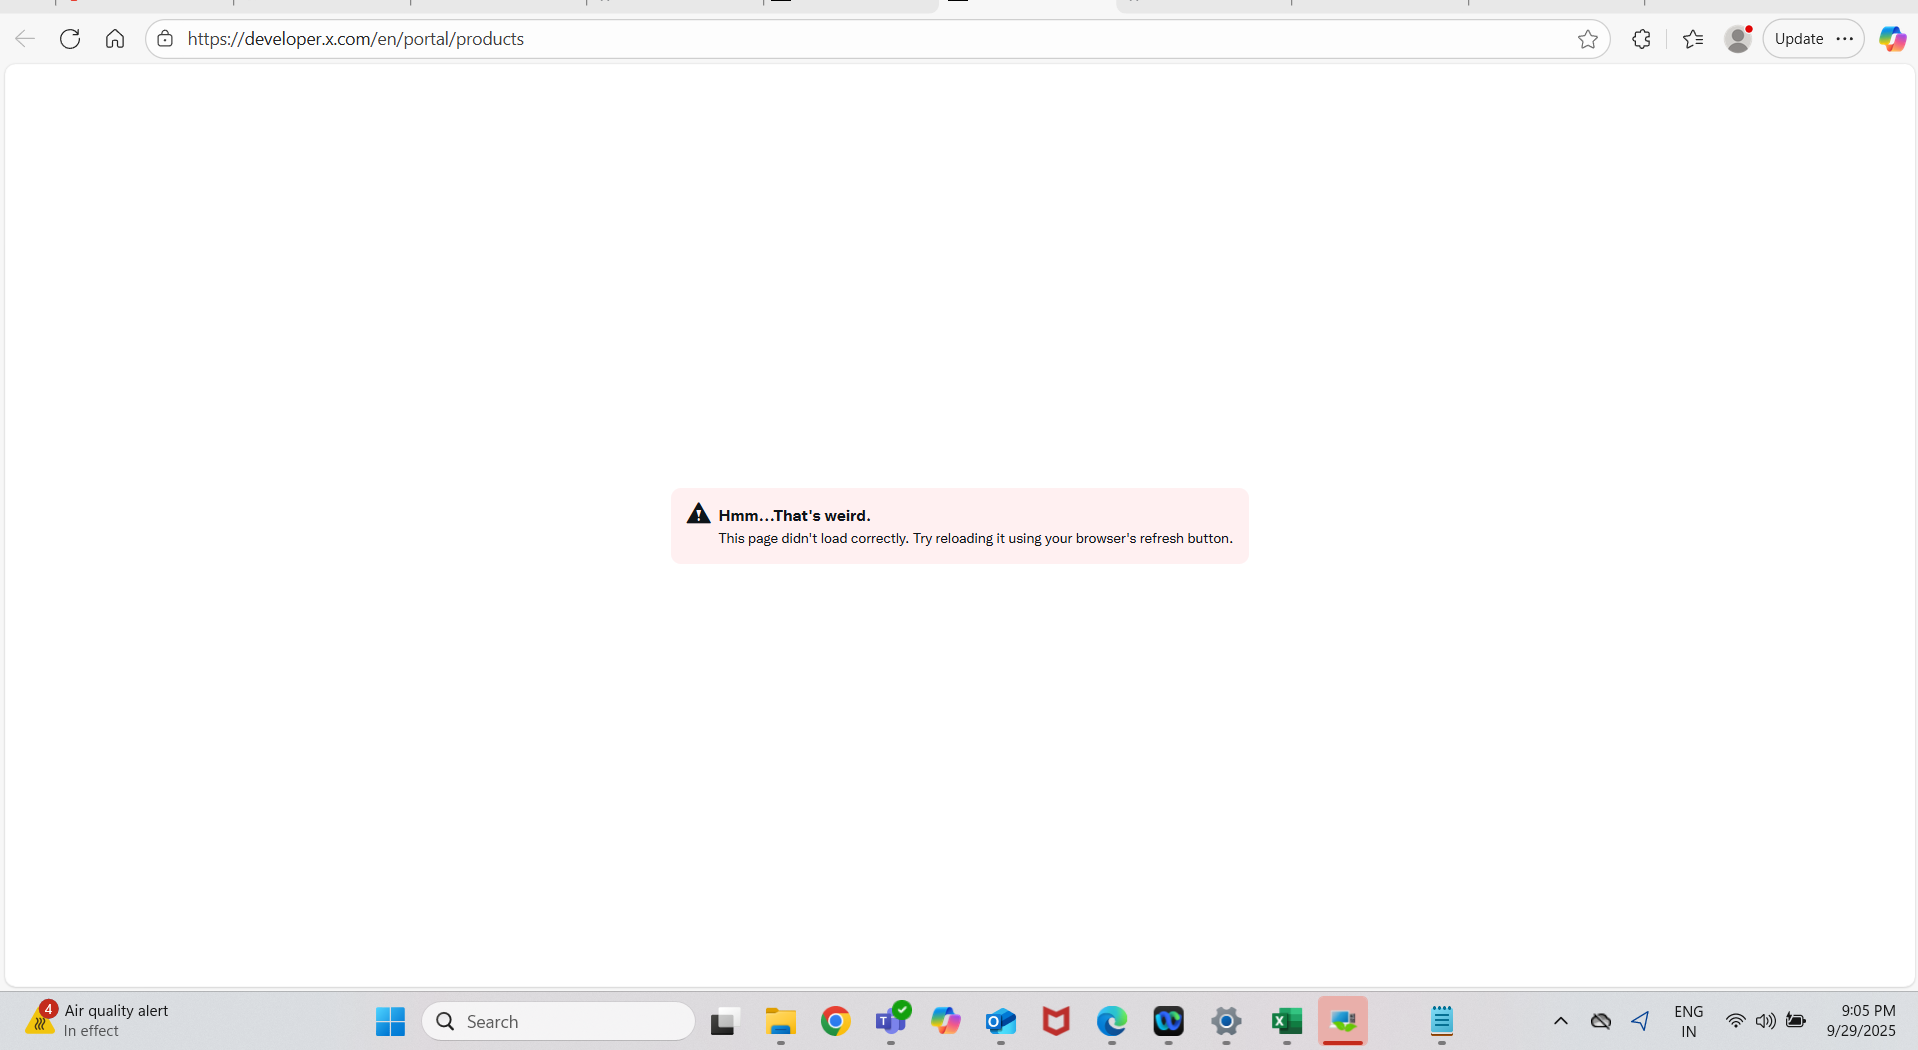

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

Reflections on the Assignment:

This was a challenging but rewarding task. The most challenging part was scraping dynamic websites like GitHub Marketplace, where pages needed to be crawled through to deal with pagination, dynamic page content, and potentially absent elements. Having the scraper effectively extract data without overwhelming servers by skipping delays altogether added an extra level of complexity. Additionally, preprocessing the scraped text meant being extremely careful when it came to cleaning the data, tokenization, stop word removal, and lemmatization to prepare the dataset for analysis.

My favorite moment was seeing the end-to-end workflow come together: from pulling real-world data in to cleaning and preprocessing it for analysis. It was satisfying to take grimy web content and make it into a usable dataset, highlighting the applied aspect of data engineering and data science.

With respect to time offered, I found the time reasonable enough to accomplish the assignment, although handling real-world web data usually brings in some unexpected variables such as dynamic content loading or altered website structures. Generally, the assignment was a harmonious balance of technical complexity and learning experience, and it strengthened my expertise in Python, Selenium, Pandas, and NLP preprocessing.

# Write your response below
Fill out survey and provide your valuable feedback.

https://docs.google.com/forms/d/e/1FAIpQLSd_ObuA3iNoL7Az_C-2NOfHodfKCfDzHZtGRfIker6WyZqTtA/viewform?usp=dialog